# Class 5: Data Transformations, Grouped Data, and Data Visualization

## Last class

- read in a csv file to `pandas`
- select rows and columns from a `pandas.DataFrame`
- rename columns of a `pandas.DataFrame`

## This class

- Transformations: create a new column in a `pandas.DataFrame`
- Transformation: groupby
- Data visualization: boxplots, histograms, and bar charts

## Census data

We have already shrunk down the census data file quite a bit to make it small enough to manage, but let's continue to make the data more readable.

In [11]:
import pandas as pd

census_df= pd.read_csv("pumf_age_employment.csv")

census_df.head()

,HH_ID,AGEGRP,AGEIMM,CF_RP,CFSTAT,CFSTRUCT,CIP2021,CITIZEN,CITOTH,CMA,EF_RP,EMPIN,HDGREE,PR,PR1,PR5,WEIGHT
0,1,11,99,3,6,9,13,1,5,999,3,1,2,35,35,35,100.417608
1,2,11,99,1,1,1,13,1,5,999,1,52000,2,24,24,24,100.111806
2,3,11,99,1,1,1,8,1,5,933,1,33000,4,59,59,59,100.481175
3,4,8,6,1,2,2,1,2,8,535,1,96000,88,35,35,35,100.417608
4,5,4,99,3,6,9,13,1,5,462,3,99999999,2,24,24,24,100.111806


## Subset the data

In this class we will explore the following columns. Let's create a subset of `census_df` with only these columns:

   + `HH_ID`: Household unique identifer
   + `AGEGRP`: Code for age range
   + `EMPIN`: Employment Income
   + `HDGREE`: Highest certificate, diploma, or degree
   + `PR`: Provnce


   

In [12]:
important_columns = [
    "HH_ID", 
    "AGEGRP", 
    "EMPIN",
    "HDGREE",
    "PR"
]

subset_census_df = census_df[important_columns]

subset_census_df.head()

,HH_ID,AGEGRP,EMPIN,HDGREE,PR
0,1,11,1,2,35
1,2,11,52000,2,24
2,3,11,33000,4,59
3,4,8,96000,88,35
4,5,4,99999999,2,24


## Rename columns so that they are meaningful

- Use the `rename` function to rename columns.

In [13]:
# dictionary of "old name":"new name"

newnames = {
        "HH_ID": "Household ID",
        "AGEGRP": "Age group",
        "EMPIN": "Employment income",
        "HDGREE": "Highest education",
        "PR": "Province",
    }

subset_census_df_colnames = subset_census_df.rename(columns = newnames)

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province
0,1,11,1,2,35
1,2,11,52000,2,24
2,3,11,33000,4,59
3,4,8,96000,88,35
4,5,4,99999999,2,24


## "Missing" Values

There are some strange values in this dataset. If you open up the dataset in a Excel, you will see that a lot of people seem to have an income of 99,999,999.  This is weirdly specific when most of the rest of the values are muliples of 1000 (or 1). There is another unusual value: 88,888,888. And if we look at other columns, we will see some similar patterns, there are 88's, 99's, and 999's.

These are special values put in where there are missing data. There are actually two kinds of missing data:
- No data available:  The survey respondant didn't answer the question
- Not applicable: The question doesn't make sense for the individual. 

Datasets often have fake values called "sentinels" that stand in for missing data. However, we need to get rid of them, otherwise they will mess up any aggregation we want to do.

Pandas has a special value called "NaN" (Not a Number). The math functions in Pandas are designed to ignore "NaN" values, which is typically want.

This meanst that we need a way to convert sentinel values like 99,999,999 to "NaN".  We actually need to introduce another tightly related library called `numpy` which defines the "NaN" value.

In [14]:
import numpy as np  #another strong convention

np.nan

nan

Now lets work on replacing these sentinels. There are a number of different ways to do this, but if we have just one value to replace we can use `.replace(old_value, new_value)` 

In [15]:
subset_census_df_colnames["Employment income"] = subset_census_df_colnames["Employment income"].replace(99999999, np.nan)

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province
0,1,11,1.0,2,35
1,2,11,52000.0,2,24
2,3,11,33000.0,4,59
3,4,8,96000.0,88,35
4,5,4,NaN,2,24


By studying the User Guide, we know that the sentinel values in our data set are 88, 99, 88888888, 99999999, so we can do this with one statement. We have to be a little careful to make sure that these numbers are valid values in other columns.

You might notice that numbers that used to be integers are now floating point numbers. This is because NaN is treated as a float, and all the other numbers are converted to match.  Mostly, you shouldn't worry about this.

In [16]:
subset_census_df_colnames = subset_census_df_colnames.replace([88, 99, 88888888, 99999999], np.nan)

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province
0,1.0,11.0,1.0,2.0,35
1,2.0,11.0,52000.0,2.0,24
2,3.0,11.0,33000.0,4.0,59
3,4.0,8.0,96000.0,NaN,35
4,5.0,4.0,NaN,2.0,24


## Data Cleaning: Creating a new column

I don't have a good reason to do this, but suppose we wanted to represent employment income in thousands of dollars instead of dollars. The code to do this is shown below.

On the left we have `subset_census_df_colnames["Employment Income (K)"]` which says that the result of the right hand side of the assignment statement will be put in a column called `"Employment Income (K)"`.  On the right side of the assignment statment, we perform the operation on each value in the column.

You may need to read this over a few times to see the full picture.

In [17]:
subset_census_df_colnames["Employment ncome (K)"] = subset_census_df_colnames["Employment income"] / 1000

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province,Employment ncome (K)
0,1.0,11.0,1.0,2.0,35,0.001
1,2.0,11.0,52000.0,2.0,24,52.000
2,3.0,11.0,33000.0,4.0,59,33.000
3,4.0,8.0,96000.0,NaN,35,96.000
4,5.0,4.0,NaN,2.0,24,NaN


## More Data Cleaning: Translating codes

Let's translate these Age group codes into the proper ranges.  The user guide gives us these definitions for the age ranges:

| Code | Description         |
|------|---------------------|
| 1    | 0 to 9 years        |
| 2    | 10 to 14 years      |
| 3    | 15 to 19 years      |
| 4    | 20 to 24 years      |
| 5    | 25 to 29 years      |
| 6    | 30 to 34 years      |
| 7    | 35 to 39 years      |
| 8    | 40 to 44 years      |
| 9    | 45 to 49 years      |
| 10   | 50 to 54 years      |
| 11   | 55 to 64 years      |
| 12   | 65 to 74 years      |
| 13   | 75 years and over   |
| 88   | Not available       |

Because we are translating each code to a more meaningful value, rather than performing a mathematical operation on the value in the column or some other kind of selection, the best option is to set up a dictionary and then use the `.map()` method .

In [18]:
age_codes = {
    1:  "0 to 9",
    2:  "10 to 14",
    3:  "15 to 19",
    4:  "20 to 24",
    5:  "25 to 29",
    6:  "30 to 34",
    7:  "35 to 39",
    8:  "40 to 44",
    9:  "45 to 49",
    10: "50 to 54",
    11: "55 to 64",
    12: "65 to 74",
    13: "75+",
}

subset_census_df_colnames["Age group label"] = subset_census_df_colnames["Age group"].map(age_codes)

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province,Employment ncome (K),Age group label
0,1.0,11.0,1.0,2.0,35,0.001,55 to 64
1,2.0,11.0,52000.0,2.0,24,52.000,55 to 64
2,3.0,11.0,33000.0,4.0,59,33.000,55 to 64
3,4.0,8.0,96000.0,NaN,35,96.000,40 to 44
4,5.0,4.0,NaN,2.0,24,NaN,20 to 24


While we are at it, let's map the province codes to their names. Here is the table from the user guide. Notice that Nunavut, Northwest Territories, and Yukon are lumped into one category.

| Code | Description |
|------|-------------|
| 10 | Newfoundland and Labrador |
| 11 | Prince Edward Island |
| 12 | Nova Scotia |
| 13 | New Brunswick |
| 24 | Quebec |
| 35 | Ontario |
| 46 | Manitoba |
| 47 | Saskatchewan |
| 48 | Alberta |
| 59 | British Columbia |
| 70 | Northern Canada |

In [19]:
province_codes = {
    10: "Newfoundland and Labrador",
    11: "Prince Edward Island",
    12: "Nova Scotia",
    13: "New Brunswick",
    24: "Quebec",
    35: "Ontario",
    46: "Manitoba",
    47: "Saskatchewan",
    48: "Alberta",
    59: "British Columbia",
    70: "Northern Canada"
}
subset_census_df_colnames["Province label"] = subset_census_df_colnames["Province"].map(province_codes)

subset_census_df_colnames.head()

,Household ID,Age group,Employment income,Highest education,Province,Employment ncome (K),Age group label,Province label
0,1.0,11.0,1.0,2.0,35,0.001,55 to 64,Ontario
1,2.0,11.0,52000.0,2.0,24,52.000,55 to 64,Quebec
2,3.0,11.0,33000.0,4.0,59,33.000,55 to 64,British Columbia
3,4.0,8.0,96000.0,NaN,35,96.000,40 to 44,Ontario
4,5.0,4.0,NaN,2.0,24,NaN,20 to 24,Quebec



- The `Age group` column has the following distribution.

In [20]:
subset_census_df_colnames["Age group label"].value_counts()

Age group label
55 to 64    29500
65 to 74    23570
75+         17111
50 to 54    12503
35 to 39    12267
45 to 49    12167
40 to 44    12148
30 to 34    11492
25 to 29     8597
20 to 24     3720
15 to 19      360
Name: count, dtype: int64

## Questions

Now that we have the data in a better structure, there are a bunch of questions we might ask.  For example:
- How does average income compare by age group, or by province, or by level of education?
- How do age demographics change across the provinces?

Some of these more interesting questions will be part of the lab and homework.

## Switching data sets
Let's switch to a simpler data set for the next section.  We are going to use our class survey to do some comparisons.

In [21]:
class_data = pd.read_csv("ggr274_survey.csv")

class_data.head()

,id,year,specialist_major,drink_type,cups_per_week,favourite_season,pets_num,pets_type,commute_mode,commute_time,intersection,city
0,1,3.0,Economics,Tea,5,Fall,0,NaN,Walking/Rolling,30,King and Spadina,Toronto
1,2,3.0,Biodiversity and Conservation Biology,Tea,4,Summer,0,NaN,Walking/Rolling,15,Bay Street and Wellesley Street,Toronto
2,3,2.0,Finance and Economics Specialist,Coffee,2,Summer,3,Dog;,Walking/Rolling,10,Spadina Avenue & Harbour Street,Toronto
3,4,2.0,B.M. Violin performance,Coffee,12,Summer,0,NaN,Subway,60,Major Mackenzie & Hwy 7,Toronto
4,5,2.0,Sociology,Tea,3,Fall,0,NaN,Walking/Rolling,15,Bay Street & Bloor Street,Toronto


First, let's getthe distribution of students in each year.

In [22]:
year_count_dist = class_data["year"].value_counts()

year_count_dist

year
3.0    22
2.0    17
4.0    17
1.0     4
5.0     1
Name: count, dtype: int64

Next, we will convert that into proportion of students in each year

In [23]:
year_prop_dist = year_count_dist / year_count_dist.sum()
year_prop_dist


year
3.0    0.360656
2.0    0.278689
4.0    0.278689
1.0    0.065574
5.0    0.016393
Name: count, dtype: float64

It's annoying that the year isn't in the right order, so let's sort by the index:

In [24]:
year_prop_dist.sort_index(ascending = True, inplace = True)

year_prop_dist   

year
1.0    0.065574
2.0    0.278689
3.0    0.360656
4.0    0.278689
5.0    0.016393
Name: count, dtype: float64

<Axes: xlabel='year'>

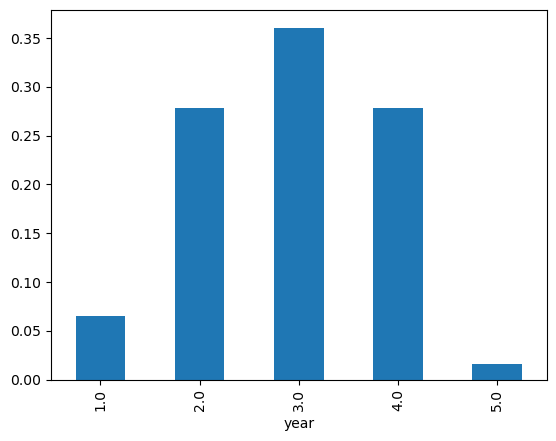

In [31]:
year_prop_dist.plot.bar()

I wonder if the number of cups of hot drinks varies by year.  Let's findout the average number of cups for each year.  To do that we need to group the data set by year in program.



In [33]:
 class_data.groupby("year", as_index=False)["cups_per_week"].mean()

,year,cups_per_week
0,1.0,3.000000
1,2.0,5.352941
2,3.0,4.590909
3,4.0,4.176471
4,5.0,5.000000


In [26]:
 class_data.groupby("year", as_index=False)[["cups_per_week", "commute_time"]].mean()


,year,cups_per_week,commute_time
0,1.0,3.000000,33.000000
1,2.0,5.352941,24.411765
2,3.0,4.590909,23.409091
3,4.0,4.176471,34.529412
4,5.0,5.000000,20.000000


In [27]:
 class_data.groupby("year")["commute_mode"].value_counts()

year  commute_mode   
1.0   Walking/Rolling     3
      Subway              1
2.0   Walking/Rolling    12
      Subway              4
      Bicycle/Scooter     1
3.0   Walking/Rolling    17
      Subway              4
      Bicycle/Scooter     1
4.0   Walking/Rolling     8
      Subway              7
      Bicycle/Scooter     1
      Car                 1
5.0   Walking/Rolling     1
Name: count, dtype: int64

<Axes: >

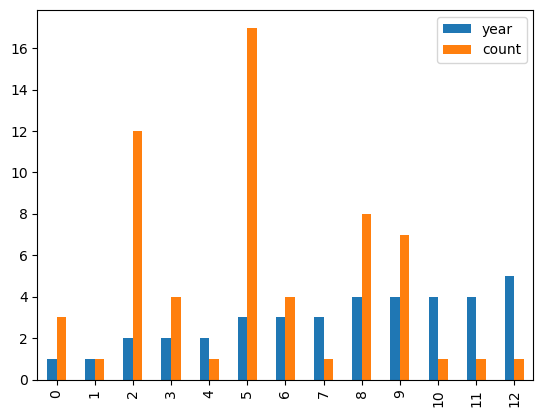

In [28]:
 class_data.groupby("year", as_index=False)["commute_mode"].value_counts().plot.bar()

<Axes: ylabel='year'>

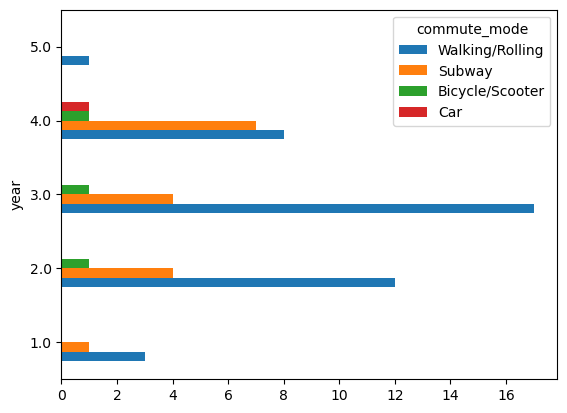

In [29]:
# ----- WON'T BE TESTED -----
# the code below is beyond what will be tested and is provided for the purpose 
# of demonstrating examples of visualizations that achieve different goals

# You can "unstack" the index an create  a better view to achieve different goals.
year_cmode_dist_df = class_data.groupby(["year"])["commute_mode"].value_counts()
year_cmode_dist_unstacked_df = year_cmode_dist_df.unstack(level=1)

# using "df.plot.barh()" to plot horizontal bars to compari proportions
year_cmode_totals = year_cmode_dist_unstacked_df.sum(axis=1)

year_cmode_dist_unstacked_df[["Walking/Rolling", "Subway", "Bicycle/Scooter", "Car"]].plot.barh()


- In pandas `axis=1` refers to columns and `axis=0` refers to rows.
- `DataFrame.sum(axis=1)`: sum across columns 
- `DataFrame.sum(axis=0)`: sum across rows.

## Statistical Variables

<h3>Categorical variable</h3>
<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>A <strong>categorical variable</strong> is a variable for which the measurement scale consists of a set of categories.</li>
<li>For example, time use has ten categories, or <strong>levels</strong>.</li>
<li>These types of variables are very common in social and biomedical sciences, and many other areas.</li>
</ul>
</div>
<div class="col-sm-5"><div style="float: right;"><img src="images/variables.png" /></div>
</div>


<div class="grid-row">
<h4>Nominal variable</h4>
<div class="col-sm-7">
<ul>
<li>Categorical variables that don't have a natural ordering is called a <strong>nominal variable</strong>.</li>
<li>For example, Canadian provinces are nominal.</li>
</ul>
</div>
<div class="col-sm-5"><img src="images/variables.png" width="90%"/></div>
</div>


<div class="grid-row">
<h4>Ordinal variable</h4>
<div class="col-sm-7">
<ul>
<li>Ordinal variables clearly order categories, but the "distance" between categories are unknown/meaningless.</li>
</ul>
</div>
<div class="col-sm-5"><img src="images/variables.png" width="90%"/></div>
</div>


<div class="grid-row">
<h4>Quantitative variable</h4>
<div class="col-sm-7">
<ul>
<li>A <strong>quantitative variable</strong> consists of numerical measurements.</li>
</ul>
</div>
<div class="col-sm-5"><img src="images/variables.png" width="90%"/></div>
</div>


<div class="grid-row">
<h4>Interval variable</h4>
<div class="col-sm-7">
<ul>
    <li><strong>An interval variable</strong> is one that does have numerical distances between any two levels of the measurement scale.  For example, calendar years is an interval variable.</li>
</ul>
</div>
<div class="col-sm-5"><img src="images/variables.png" width="90%"/></div>
</div>




<div class="grid-row">
<h4>Ratio variable</h4>
<div class="col-sm-7">
<ul>
<li>A <strong>ratio variable</strong> has both numerical differences and relative scales. A 0 holds semantic meaning.</li>
<li>Income in dollar and age in years are examples of ratio (statistical) variables.</li>
<li>Time use of 0 minute means no time spent.</li>
</ul>
</div>
<div class="col-sm-5"><img src="images/variables.png" width="90%"/></div>
</div>

## What's the difference between a Statistical Variable and a Variable in python?

- A variable in python is a location in computer memory to store a value.

- A statistical variable is essentially a mathematical representation of data.

## Examples of implementing statistical variables in python

If 10 people are *randomly* selected, and asked what their weekly income is, then this data could be represented by an **ratio variable**.
   + In python the data could be represented in `pandas.Series`, where the `Series` data type is float.

If 10 people are *randomly* selected, and asked if they live in urban or rural areas, then this data could be represented by an **categorical variable**.
   + In python the data could be represented in `pandas.Series`, where the `Series` data type is Boolean (`True` if urban, and `False` if not urban).


## Distributions

The distributions of quantitative variables are often described as:

- a measure of **centre** such as mean, median, and mode

- a measure of **spread** such as standard deviation and inter-quartile range

- a measure of **range** - the largest value minus the smallest value (or max - min)

## Quantiles

- The median value is the 50% quantile.  50% of the values fall below this value.  The median is also called the second quartile.

- The 25% quantile is the value where 25% of the values fall below.  This is often the first quartile (Q1)  

- The 75% quantile is the value where 75% of the values fall below.  This is often the third quartile (Q3)

## Variation

- One of the most important concepts in statistical reasoning.

- Standard deviation is average deviation from the mean.  **Large** values mean large variation and **small** values mean small variation.   

- Small samples often have large variation, so estimating a statistic from a small sample is usually less reliable.

## Boxplots 

- Another way to visualize the distribution of a quantitative variable

- A box plot is a method for graphically depicting groups of numerical data through their quartiles. 
- The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
- The whiskers extend from the edges of box to show the range of the data. 
- By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

## Anatomy of a Boxplot

![](images/boxplot_anatomy.png)

Boxplots are helpful for comparing the distributions between groups.

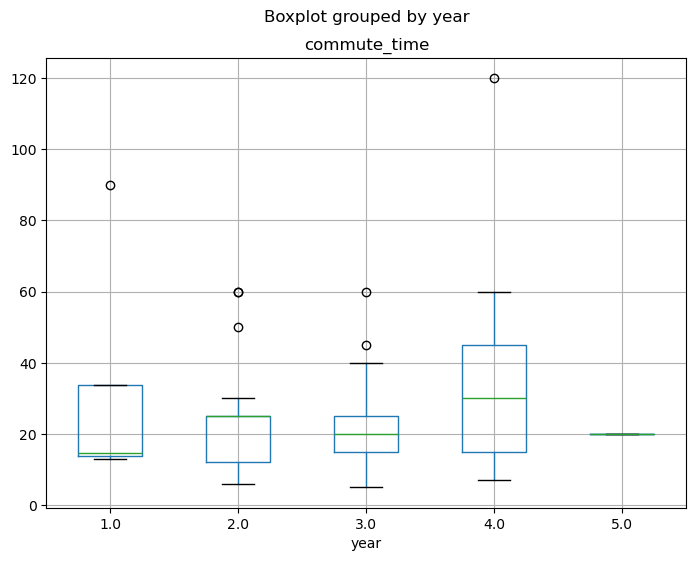

In [34]:
hot_drinks_by_year_boxplots = class_data.boxplot(
    column="commute_time", 
    by="year", 
    figsize=(8,6)
);

In [35]:
class_data.groupby("year")["commute_time"].describe()


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1.0,4.0,33.000000,38.008771,13.0,13.75,14.5,33.75,90.0
2.0,17.0,24.411765,17.080906,6.0,12.00,25.0,25.00,60.0
3.0,22.0,23.409091,12.381473,5.0,15.00,20.0,25.00,60.0
4.0,17.0,34.529412,27.647599,7.0,15.00,30.0,45.00,120.0
5.0,1.0,20.000000,NaN,20.0,20.00,20.0,20.00,20.0
